https://www.datacamp.com/community/tutorials/introduction-machine-learning-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034361&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9073682&gclid=Cj0KCQjwwOz6BRCgARIsAKEG4FX_lXIEvoTh9F-RfOq4T9VmX1jXIu-_qvTkCO1RaD-D8e6MKhKvwR0aAiYDEALw_wcB

In [19]:
from sklearn.datasets import load_iris

In [20]:
data = load_iris().data

In [21]:
data.shape

(150, 4)

In [22]:
#Let's extract the class labels.

labels = load_iris().target


In [23]:
labels.shape

(150,)

In [24]:
import numpy as np

In [25]:
labels = np.reshape(labels,(150,1))

In [28]:
data = np.concatenate([data,labels],axis=-1)

In [29]:
data.shape

(150, 5)

In [30]:
import pandas as pd

In [32]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [33]:
dataset = pd.DataFrame(data,columns=names)

In [35]:
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

In [36]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
import matplotlib.pyplot as plt

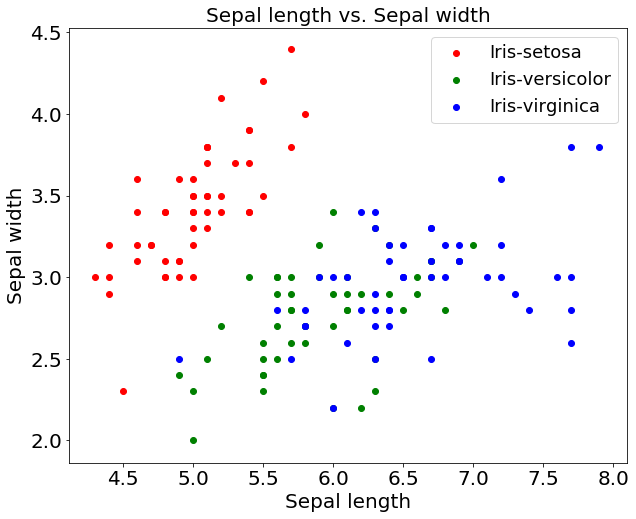

In [39]:
plt.figure(4, figsize=(10, 8))
plt.scatter(data[:50, 0], data[:50, 1], c='r', label='Iris-setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], c='g',label='Iris-versicolor')
plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')
plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()


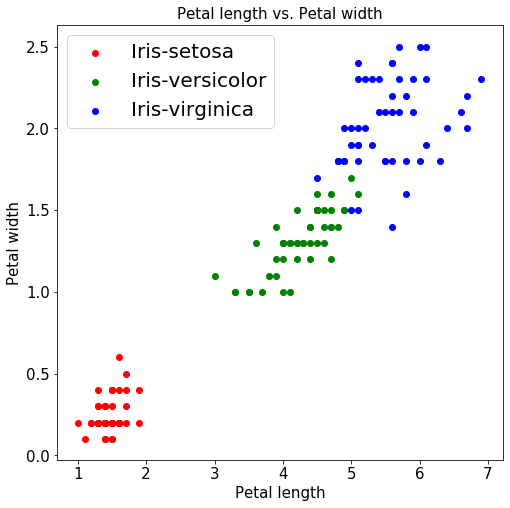

In [40]:
#graph for petal-length and petal-width
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='r', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='g',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [41]:
dataset.iloc[:,2:].corr()

,petal-length,petal-width
petal-length,1.000000,0.962865
petal-width,0.962865,1.000000


In [42]:
dataset.iloc[:50,:].corr() #setosa

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [43]:
dataset.iloc[50:100,:].corr() #versicolor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [44]:
dataset.iloc[100:,:].corr() #virginica

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


/home/kennedy/yes/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


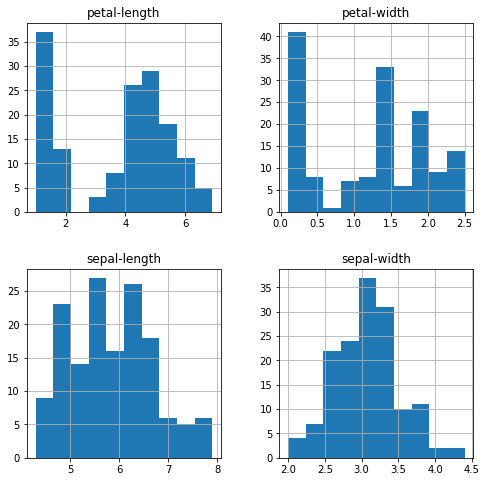

In [47]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()


In [48]:
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [49]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
#split the data

from sklearn.model_selection import train_test_split

In [52]:
train_data,test_data,train_label,test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,4], test_size=0.2, random_state=42)

In [53]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((120, 3), (120,), (30, 3), (30,))

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [60]:
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(train_data, train_label)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)

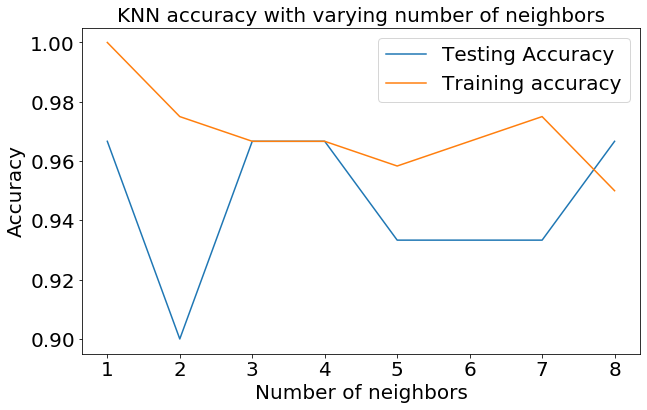

In [61]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [62]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)


In [63]:
test_accuracy

0.9666666666666667